In [1]:
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np
from neuroslice import predict_mask, mask2cuboid_array

# Change this to your actual FLAIR MRI file path
nifti_path = "FLAIR.nii.gz"

# ## 3. Generate tumor mask with coronal model
print("Running YOLO-based tumor detection (coronal model)...")
mask = predict_mask(nifti_path, axis=1, verbose=True)

# ## 4. Create cuboid version of the mask
cuboid_mask = mask2cuboid_array(mask)

/opt/miniconda3/envs/test/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running YOLO-based tumor detection (coronal model)...
Generating tumor mask...


Detecting tumors: 100%|██████████| 240/240 [00:23<00:00, 10.06it/s]

Segmentation complete!
   Total voxels: 8,928,000
   Tumor voxels: 179,790
   Tumor percentage: 2.01%


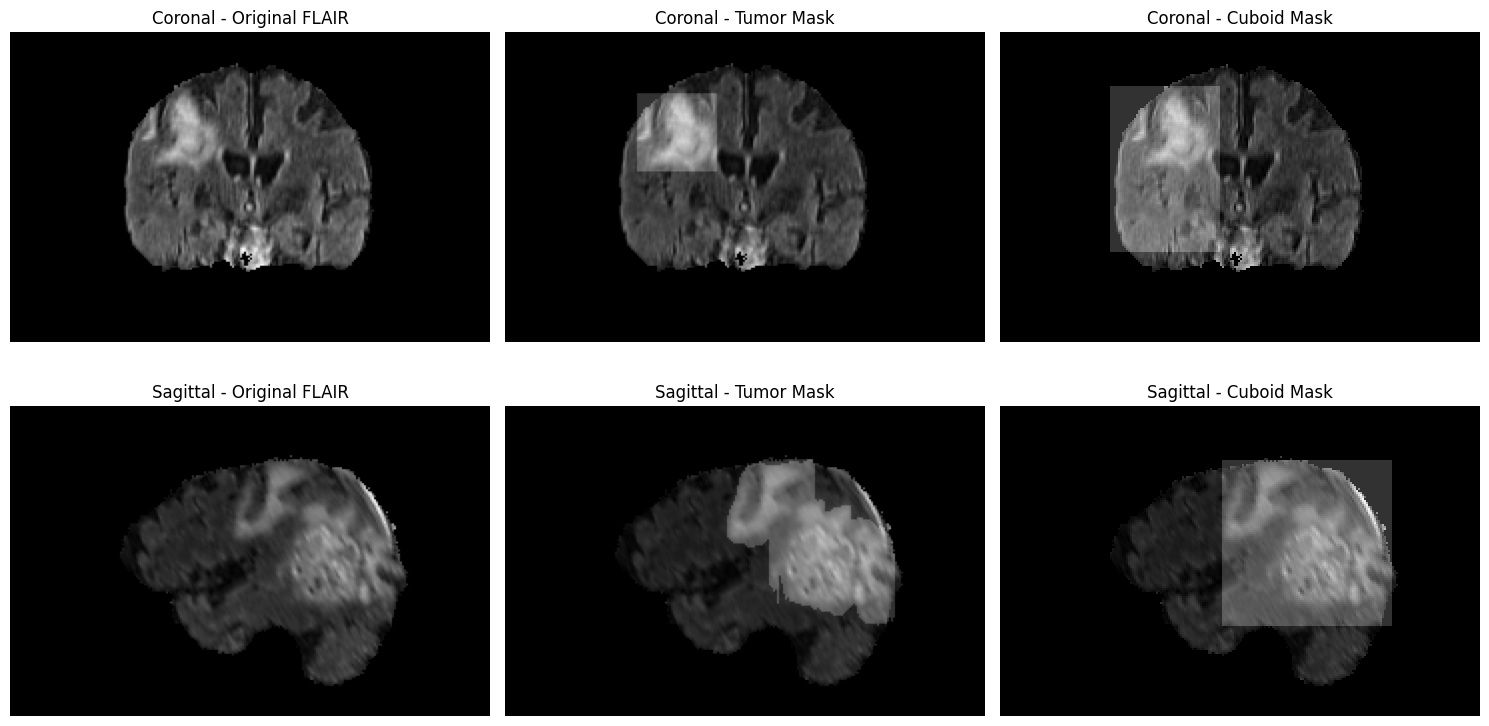

In [2]:
# ## 5. Load MRI data for visualization
nifti = nib.load(nifti_path)
data = nifti.get_fdata()

# Normalize MRI for display
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# ## 6. Get middle slices for both orientations
mid_coronal = data.shape[1] // 2    # coronal = axis 1
mid_sagittal = data.shape[0] // 3   # sagittal = axis 0

# Extract coronal slices
mri_coronal = data[:, mid_coronal, :]
mask_coronal = mask[:, mid_coronal, :]
cuboid_coronal = cuboid_mask[:, mid_coronal, :]

# Extract sagittal slices
mri_sagittal = data[mid_sagittal, :, :]
mask_sagittal = mask[mid_sagittal, :, :]
cuboid_sagittal = cuboid_mask[mid_sagittal, :, :]

# ## 7. Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# --- Row 1: Coronal view ---
axes[0, 0].imshow(np.rot90(mri_coronal), cmap="gray")
axes[0, 0].set_title("Coronal - Original FLAIR")

axes[0, 1].imshow(np.rot90(mri_coronal), cmap="gray")
axes[0, 1].imshow(np.rot90(mask_coronal), cmap="gray", alpha=0.2)
axes[0, 1].set_title("Coronal - Tumor Mask")

axes[0, 2].imshow(np.rot90(mri_coronal), cmap="gray")
axes[0, 2].imshow(np.rot90(cuboid_coronal), cmap="gray", alpha=0.2)
axes[0, 2].set_title("Coronal - Cuboid Mask")

# --- Row 2: Sagittal view ---
axes[1, 0].imshow(np.rot90(mri_sagittal), cmap="gray")
axes[1, 0].set_title("Sagittal - Original FLAIR")

axes[1, 1].imshow(np.rot90(mri_sagittal), cmap="gray")
axes[1, 1].imshow(np.rot90(mask_sagittal), cmap="gray", alpha=0.2)
axes[1, 1].set_title("Sagittal - Tumor Mask")

axes[1, 2].imshow(np.rot90(mri_sagittal), cmap="gray")
axes[1, 2].imshow(np.rot90(cuboid_sagittal), cmap="gray", alpha=0.2)
axes[1, 2].set_title("Sagittal - Cuboid Mask")

# Clean layout
for ax_row in axes:
    for ax in ax_row:
        ax.axis("off")

plt.tight_layout()
plt.show()
